In [4]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv('Symptom2Disease.csv')

# 通过疾病名称进行分组
grouped = df.groupby('disease')

# 初始化一个新的DataFrame来存储结果
result_df = pd.DataFrame()

# 遍历每个疾病的描述
for disease_name, group in grouped:
    # 将每个疾病的描述连接成一个字符串，以逗号分隔
    descriptions = ', '.join(group['description'])
    
    # 将描述字符串分割成列表
    description_list = descriptions.split(', ')
    
    # 创建新的列名，如description1, description2, ...
    new_columns = [f'description{i+1}' for i in range(len(description_list))]
    
    # 创建一个字典，其中键是新列名，值是描述列表中的对应描述
    row_data = {column: description for column, description in zip(new_columns, description_list)}
    
    # 将字典转换为DataFrame，并将其添加到结果DataFrame中
    temp_df = pd.DataFrame([row_data])
    result_df = pd.concat([result_df, temp_df], ignore_index=True)

# 将结果保存为新的CSV文件
result_df.to_csv('result.csv', index=False)


In [1]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv('Symptom2Disease.csv')

# 通过groupby将疾病描述分组，并使用cumcount创建描述列的新名称
df['description_num'] = df.groupby('disease').cumcount() + 1

# 透视表，将每个疾病的不同描述作为列，并使用pivot
pivot_df = df.pivot(index='disease', columns='description_num', values='description')

# 重命名列，将列名称改为description1，description2...
pivot_df.columns = [f'description{col}' for col in pivot_df.columns]

# 将结果保存为Excel文件
pivot_df.reset_index().to_excel('output.xlsx', index=False)

In [3]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv('traning.csv')

# 创建一个新列，用于存储症状描述
df['symptoms_description'] = ''

# 遍历每一行，将症状整合为一句话
for index, row in df.iterrows():
    symptoms = [col.replace('_', ' ') for col in df.columns[1:] if row[col] == 'yes']
    symptoms_description = ', '.join(symptoms)
    df.at[index, 'symptoms_description'] = f'I have {symptoms_description}'

# 删除原始的症状列
df = df.drop(columns=df.columns[1:-1])

# 保存结果到一个新的CSV文件
df.to_csv('output.csv', index=False)


In [4]:
import pandas as pd

# 读取已处理的CSV文件
df = pd.read_csv('output.csv')

# 通过groupby将疾病分组，并使用cumcount创建描述列的新名称
df['description_num'] = df.groupby('prognosis').cumcount() + 1

# 透视表，将每个疾病的不同描述作为列，并使用pivot
pivot_df = df.pivot(index='prognosis', columns='description_num', values='symptoms_description')

# 重命名列，将列名称改为description1，description2...
pivot_df.columns = [f'description{col}' for col in pivot_df.columns]

# 重置索引
pivot_df.reset_index(inplace=True)

# 将结果保存为CSV文件或Excel文件
pivot_df.to_csv('output_descriptions.csv', index=False)
# pivot_df.to_excel('output_descriptions.xlsx', index=False)


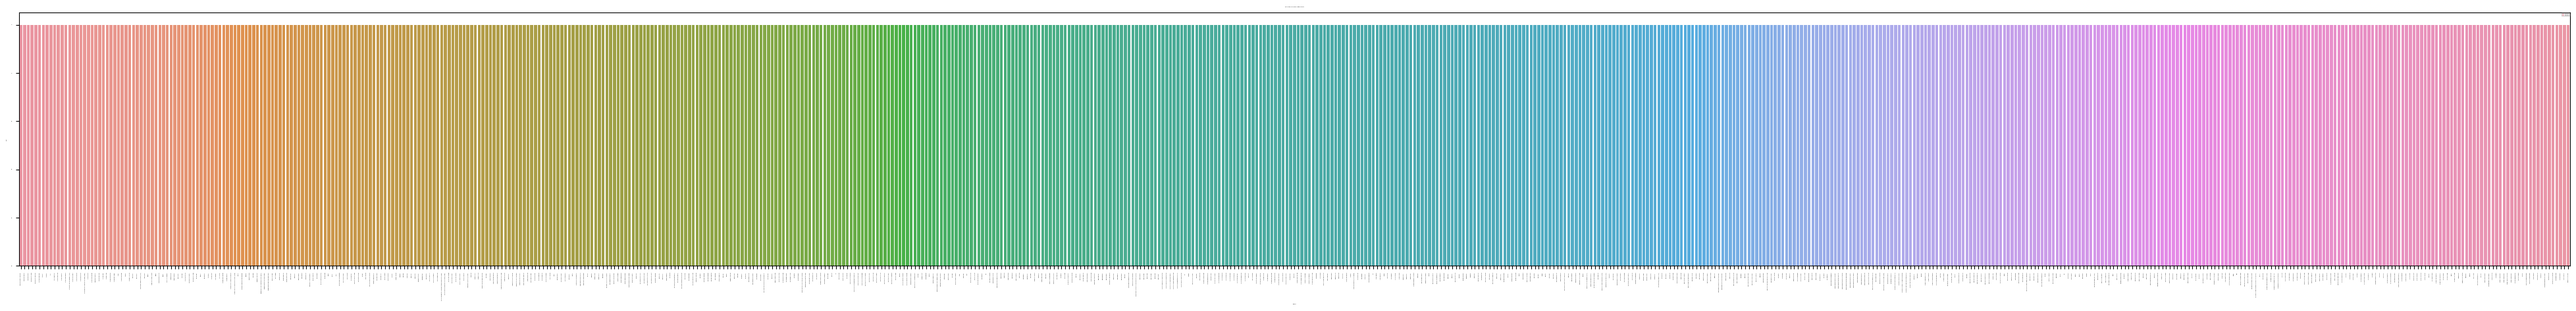

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取两个数据集
df1 = pd.read_csv('disease_1.csv')
df2 = pd.read_csv('disease_2.csv')

# 示例1：绘制疾病分布柱状图
plt.figure(figsize=(50, 5))
fontsize = 1
sns.countplot(data=df1, x='disease', label='Dataset 1')
sns.countplot(data=df2, x='disease', label='Dataset 2')
plt.xticks(rotation=90, fontsize=fontsize)  # 调整x轴标签的字体大小
plt.xlabel('Disease', fontsize=fontsize)  # 调整x轴标签的字体大小
plt.ylabel('Count', fontsize=fontsize)  # 调整y轴标签的字体大小
plt.title('Distribution of Diseases in Both Datasets', fontsize=fontsize)  # 调整标题的字体大小
plt.legend(fontsize=fontsize)  # 调整图例的字体大小
plt.tick_params(axis='y', labelsize=fontsize)  # 调整y轴刻度的字体大小
plt.show()
